In [1]:
import tensorflow as tf
tf.enable_eager_execution()

tf.__version__

'1.14.0'

In [2]:
AUTOTUNE=tf.data.experimental.AUTOTUNE

In [40]:
import pathlib
#help(tf.keras.utils.get_file)

data_root = '/tf/notebooks/tf_official/load_data/flower_photos'
data_root = pathlib.Path(data_root)
#help(pathlib.Path)
for item in data_root.iterdir():
    print(item)

data_root

/tf/notebooks/tf_official/load_data/flower_photos/LICENSE.txt
/tf/notebooks/tf_official/load_data/flower_photos/roses
/tf/notebooks/tf_official/load_data/flower_photos/sunflowers
/tf/notebooks/tf_official/load_data/flower_photos/dandelion
/tf/notebooks/tf_official/load_data/flower_photos/daisy
/tf/notebooks/tf_official/load_data/flower_photos/tulips


PosixPath('/tf/notebooks/tf_official/load_data/flower_photos')

In [27]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
all_image_paths
random.shuffle(all_image_paths)
#help(random.shuffle)
all_image_paths
image_count = len(all_image_paths)
image_count

3670

In [28]:
all_image_paths[:10]

['/tf/notebooks/tf_official/load_data/flower_photos/roses/4553266758_09d4dbdac9_n.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/dandelion/4496277750_8c34256e28.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/daisy/19975899671_ebc42b7865_n.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/dandelion/3496258301_ca5f168306.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/roses/17990320484_93bba345d2_m.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/daisy/6596277835_9f86da54bb.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/tulips/7166567320_0a2beb6d42.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/daisy/4432271543_01c56ca3a9.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/dandelion/8747223572_dcd9601e99.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/daisy/8071646795_2fdc89ab7a_n.jpg']

In [65]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

attributions


{'daisy/7568630428_8cf0fc16ff_n.jpg': ' by A Guy Taking Pictures - https://www.flickr.com/photos/80901381@N04/7568630428/\n',
 'daisy/7410356270_9dff4d0e2e_n.jpg': ' by martinak15 - https://www.flickr.com/photos/martinaphotography/7410356270/\n',
 'daisy/4286053334_a75541f20b_m.jpg': ' by jenny downing - https://www.flickr.com/photos/jenny-pics/4286053334/\n',
 'daisy/10770585085_4742b9dac3_n.jpg': ' by Thangaraj Kumaravel - https://www.flickr.com/photos/kumaravel/10770585085/\n',
 'daisy/8759177308_951790e00d_m.jpg': ' by Marina del Castell - https://www.flickr.com/photos/marinadelcastell/8759177308/\n',
 'daisy/4131565290_0585c4dd5a_n.jpg': ' by jenny downing - https://www.flickr.com/photos/jenny-pics/4131565290/\n',
 'daisy/3504430338_77d6a7fab4_n.jpg': ' by Dhilung Kirat - https://www.flickr.com/photos/dhilung/3504430338/\n',
 'daisy/3084924076_4d5c5711af_m.jpg': ' by Bùi Linh Ngân - https://www.flickr.com/photos/linhngan/3084924076/\n',
 'daisy/2642408410_61545fdc83_n.jpg': ' by D

In [68]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0)" + \
            ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

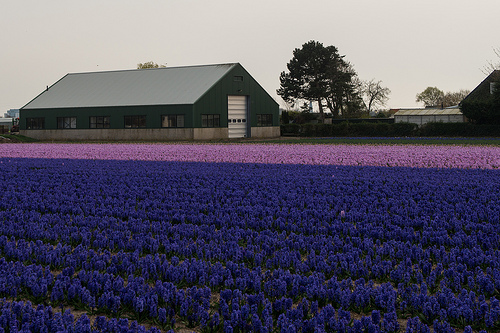

Image (CC BY 2.0) by nikontino


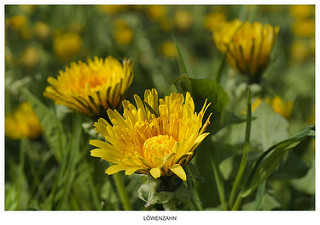

Image (CC BY 2.0) by Norbert Reimer


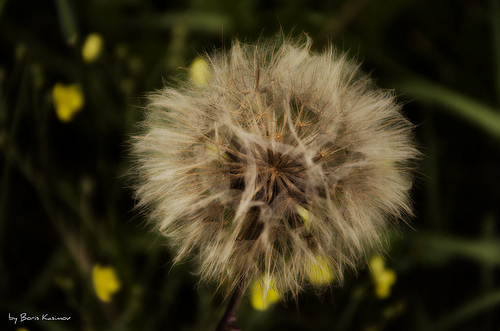

Image (CC BY 2.0) by Boris Kasimov


In [79]:
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(caption_image(image_path))

In [85]:
label_names = sorted(item.name for item in data_root.glob('*/')
                                  if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [107]:
label_to_index = dict(
    (name, index) for index, name in enumerate(label_names)
)
label_to_index 

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [106]:
a = enumerate(label_names)
a
#help(a)

In [114]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                       for path in all_image_paths]
print('first 10 labels indices', all_image_labels[:10])

first 10 labels indices [2, 1, 0, 1, 2, 0, 4, 0, 1, 0]


In [141]:
image_path = all_image_paths[1]
print(image_path)
img_raw = tf.io.read_file(image_path)
#print(repr())
print(repr(img_raw)[:100]+'...')

img_tensor = tf.image.decode_image(img_raw)
print(img_tensor.shape)
print(img_tensor.dtype)

/tf/notebooks/tf_official/load_data/flower_photos/dandelion/4496277750_8c34256e28.jpg
<tf.Tensor: id=239, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00...
(333, 500, 3)
<dtype: 'uint8'>


In [147]:
img_final = tf.image.resize(img_tensor,[192,192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
1.0


In [148]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image,[192,192])
    image /= 255.0 #normalize to [0, 1] range
    return image

In [169]:
def load_and_preprocess_image(path):
    image = tf.read_file(path)
    return preprocess_image(image) 

/tf/notebooks/tf_official/load_data/flower_photos/roses/4553266758_09d4dbdac9_n.jpg
2



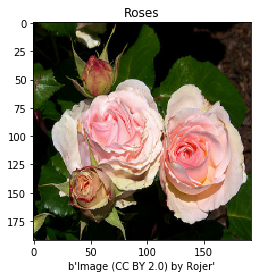

In [186]:
import matplotlib.pyplot as plt

img_path = all_image_paths[0]
label = all_image_labels[0]
print(img_path)
print(label)


plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path).encode('utf-8'))
plt.title(label_names[label].title())
print()


In [82]:
image_path = random.choice(all_image_paths)
a = pathlib.Path(image_path).relative_to(data_root)

print(attributions[str(a)])
attributions[str(a)].split(' - ')[:-1]
a = ' - '.join(attributions[str(a)].split(' - ')[:-1])
a

 by Susanne Nilsson - https://www.flickr.com/photos/infomastern/18243329421/



' by Susanne Nilsson'